<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [3]:
yelp.shape

(10000, 9)

In [4]:
import spacy
nlp = spacy.load("en_core_web_lg")

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [198]:
import re
def cleanup(text):
    return re.sub('[^a-zA-Z ]', '', text).lower()

yelp['clean_text'] = yelp['text'].apply(cleanup)
yelp['clean_text'].head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    beware fake fake fakewe also own a small busin...
1    came here for lunch togo service was quick sta...
2    ive been to vegas dozens of times and had neve...
3    we went here on a night where they closed off ...
4     to  starsnot bad for the price  for lunch sen...
Name: clean_text, dtype: object

In [199]:
stop_words = ['yelp','review', 'not', 'go', 'get', 'come', 'good', 'try', 'like']
stops = nlp.Defaults.stop_words.union(stop_words)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
yelp['clean_text'][6]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'this show is absolutely amazing what an incredible production and perfection in musicianship  i was transported back to the s and rode the wave through the s and s  this is a must see for us baby boomers  i was up singing and dancing for the whole show  i could have stayed another hour  fabulous in every way  airy comfortable theatre great sound and lighting  the jumbotron visuals were not only nostalgic they were funny and exciting to watch  did we really dress and wear our hair that way the commentary was amusing emotional and interesting where it could have been cheesy  everything about this fabulous show is perfection  dont miss it this show is going to be the talk of las vegas  it has only recently opened but it is likely to go on for a long long time  thanks for a terrific fun evening guys it made my weekend'

In [230]:
def tokenize(doc):
    
    mydoc = nlp(doc)
    lemmaed =[]
    for token in mydoc:
        if (token.is_stop != True) and (token.is_punct != True) and (token.pos_ != 'PRON'):
            keyword = token.lemma_.strip()
            if keyword in stops:
                pass
            # to exclude blanks
            elif len(keyword) > 2: 
                lemmaed.append(keyword)
    return lemmaed

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
# dir(token)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
for token in nlp(yelp['clean_text'][6]):
    if (token.is_stop != True) and (token.is_punct != True) and (token.pos_ != 'PRON'):
        keyword = token.lemma_.strip()
        if keyword in stops:
            pass
        # to exclude blanks
        elif len(keyword) > 2: 
            print(f"lemma is {token.lemma_}, strip is:{token.lemma_.strip()}<")

lemma is absolutely, strip is:absolutely<
lemma is amazing, strip is:amazing<
lemma is incredible, strip is:incredible<
lemma is production, strip is:production<
lemma is perfection, strip is:perfection<
lemma is musicianship, strip is:musicianship<
lemma is transport, strip is:transport<
lemma is ride, strip is:ride<
lemma is wave, strip is:wave<
lemma is baby, strip is:baby<
lemma is boomer, strip is:boomer<
lemma is singe, strip is:singe<
lemma is dance, strip is:dance<
lemma is stay, strip is:stay<
lemma is hour, strip is:hour<
lemma is fabulous, strip is:fabulous<
lemma is way, strip is:way<
lemma is airy, strip is:airy<
lemma is comfortable, strip is:comfortable<
lemma is theatre, strip is:theatre<
lemma is great, strip is:great<
lemma is sound, strip is:sound<
lemma is lighting, strip is:lighting<
lemma is jumbotron, strip is:jumbotron<
lemma is visual, strip is:visual<
lemma is nostalgic, strip is:nostalgic<
lemma is funny, strip is:funny<
lemma is exciting, strip is:exciting<


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [232]:
tokenize(yelp['clean_text'][6])

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['absolutely',
 'amazing',
 'incredible',
 'production',
 'perfection',
 'musicianship',
 'transport',
 'ride',
 'wave',
 'baby',
 'boomer',
 'singe',
 'dance',
 'stay',
 'hour',
 'fabulous',
 'way',
 'airy',
 'comfortable',
 'theatre',
 'great',
 'sound',
 'lighting',
 'jumbotron',
 'visual',
 'nostalgic',
 'funny',
 'exciting',
 'watch',
 'dress',
 'wear',
 'hair',
 'way',
 'commentary',
 'amusing',
 'emotional',
 'interesting',
 'cheesy',
 'fabulous',
 'perfection',
 'miss',
 'talk',
 'las',
 'vegas',
 'recently',
 'open',
 'likely',
 'long',
 'long',
 'time',
 'thank',
 'terrific',
 'fun',
 'evening',
 'guy',
 'weekend']

In [231]:
yelp['clean_tokens'] = yelp['clean_text'].apply(tokenize)
yelp['clean_tokens'].head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [beware, fake, fake, fakewe, small, business, ...
1    [lunch, togo, service, quick, staff, friendly,...
2    [vegas, dozen, time, step, foot, circus, circu...
3    [night, close, street, party, actually, group,...
4    [starsnot, bad, price, lunch, senior, pay, eat...
Name: clean_tokens, dtype: object

In [233]:
yelp['clean_tokens'].head(50)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     [beware, fake, fake, fakewe, small, business, ...
1     [lunch, togo, service, quick, staff, friendly,...
2     [vegas, dozen, time, step, foot, circus, circu...
3     [night, close, street, party, actually, group,...
4     [starsnot, bad, price, lunch, senior, pay, eat...
5     [tasty, fast, casual, latin, street, food, men...
6     [absolutely, amazing, incredible, production, ...
7     [pho, enjoy, busy, serve, right, away, broth, ...
8     [absolutely, unique, experience, nail, shop, f...
9     [wow, walk, sit, bar, minute, bartender, work,...
10    [pop, dinner, yesterday, reservation, despite,...
11    [thw, bad, stay, end, pay, night, maybe, nice,...
12    [great, friendly, customer, service, quality, ...
13    [food, great, super, busy, server, attentive, ...
14    [talk, rip, charge, shut, valve, cost, realize...
15    [girl, night, tonight, kid, decide, drive, hop...
16    [stop, drink, fly, charlotte, week, bartender,...
17    [excellent, restaurant, encourage, visit, 

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [235]:
# Create bag of words and returns a meaure of count for each review based on its uniqueness
tfidf = TfidfVectorizer(ngram_range=(1,2),
                        stop_words='english',
                        max_df=.8,
                        min_df= 3,
                        max_features=100,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(yelp['clean_text'])
# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amazing,area,ask,awesome,bad,bar,big,bit,bring,burger,...,try,vegas,visit,wait,walk,want,way,work,worth,year
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.25414,0.000000,0.0,0.296355,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.136188,0.0,0.0,0.000000,0.134922,0.0,0.000000,0.0,0.0,...,0.00000,0.272807,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.129705
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.211974,0.464884,0.0,0.233888,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [236]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [237]:
print(len(dtm.iloc[0]))   # tfidf vector of all articles with respect to the first article

print(type(dtm.iloc[92].values))
# returns a list of five nearest neighbors distance, and another list of those neighbors' row number
nn.kneighbors([dtm.iloc[0].values])

100
<class 'numpy.ndarray'>


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([[0.        , 0.73666793, 0.81809706, 0.81809706, 0.81809706,
         0.86491255, 0.89029169, 0.9101442 , 0.92091018, 0.92391536]]),
 array([[   0, 4486, 8017, 3412,  262, 3133, 8575, 1861, 2045, 8437]]))

In [238]:
rndm_review = [ "We went to Togo lunch in Vegas. Price was good and it was awesome"]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
new_dtm = tfidf.transform(rndm_review)
print(new_dtm.shape)

(1, 100)


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
nn.kneighbors(new_dtm.todense())

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([[0.87708969, 0.87924582, 0.90498294, 0.91701733, 0.92022996,
         0.92735254, 0.92838584, 0.96088408, 0.96171207, 0.96803653]]),
 array([[7718, 8848, 6129, 4949, 2956, 8989, 4404, 8740, 2405, 1132]]))

In [241]:
# Need to remove non-english characters
yelp["text"][7718]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Went for a light lunch today and had the steamed BBQ pork rolls and beef & chive dim sum. All very good and great prices! Will be back soon!'

* We get similar keywords in the neighboring queries

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [242]:
yelp["stars"].value_counts()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5    4462
4    2185
1    1496
3    1098
2     759
Name: stars, dtype: int64

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [244]:
rfc = RandomForestClassifier()

pipe = Pipeline([
        ('vect', tfidf), 
        ('clf', rfc)
        ])

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [245]:
parameters = {
#     'vect__max_df': (0.75, 0.85),
    'clf__max_depth':(5,10)
}

grid_search = GridSearchCV(pipe,parameters, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(yelp['clean_text'], yelp['stars'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.8,
                                                        max_features=100,
                                                        min_df=3,
                                                        ngram_range=(1, 2),
                                                        nor

In [246]:
grid_search.best_params_

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'clf__max_depth': 5}

In [247]:
# Predictions on test sample
pred = grid_search.predict(rndm_review)
pred

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([5])

* It gives a star rating 5 which matches the review content :)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [248]:
import gensim
from gensim.models import LdaMulticore
# from gensim.corpora import Dictionary
from gensim import corpora

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Learn the vocubalary of the yelp data:

In [258]:
id2word = corpora.Dictionary(yelp['clean_tokens'])
print(len(id2word),len(yelp))

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30784 10000


In [259]:
id2word.filter_extremes(no_below=15, no_above=0.85)
len(id2word.keys())

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2859

Create a bag of words representation of the entire corpus

In [260]:
corpus = [id2word.doc2bow(text) for text in yelp['clean_tokens']]
len(corpus)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10000

Your LDA model should be ready for estimation: 

In [261]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=2,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
lda.print_topics()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.014*"place" + 0.014*"food" + 0.013*"great" + 0.012*"like" + 0.010*"time" + 0.009*"try" + 0.007*"service" + 0.007*"love" + 0.006*"order" + 0.005*"chicken"'),
 (1,
  '0.016*"food" + 0.015*"place" + 0.015*"time" + 0.009*"great" + 0.009*"service" + 0.008*"like" + 0.007*"order" + 0.006*"recommend" + 0.006*"love" + 0.006*"day"'),
 (2,
  '0.014*"place" + 0.013*"time" + 0.013*"great" + 0.012*"food" + 0.009*"like" + 0.009*"service" + 0.009*"order" + 0.006*"try" + 0.006*"love" + 0.005*"want"'),
 (3,
  '0.014*"food" + 0.013*"place" + 0.011*"service" + 0.010*"like" + 0.010*"order" + 0.009*"time" + 0.006*"great" + 0.006*"try" + 0.005*"find" + 0.005*"look"'),
 (4,
  '0.014*"place" + 0.011*"food" + 0.011*"service" + 0.010*"time" + 0.009*"great" + 0.009*"order" + 0.008*"like" + 0.008*"try" + 0.007*"love" + 0.006*"nice"'),
 (5,
  '0.013*"food" + 0.011*"time" + 0.011*"place" + 0.009*"service" + 0.009*"like" + 0.009*"order" + 0.009*"great" + 0.008*"try" + 0.007*"love" + 0.005*"eat"'),
 (6,
  '0

Create 1-2 visualizations of the results

In [264]:
words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(10)]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [265]:
print(len(words))
words[0]

10


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['"place"',
 '"food"',
 '"great"',
 '"like"',
 '"time"',
 '"try"',
 '"service"',
 '"love"',
 '"order"',
 '"chicken"']

In [270]:
topic_labels = [', '.join(t[:]) for t in words]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"place", "food", "great", "like", "time", "try", "service", "love", "order", "chicken"

------ Topic 1 ------
"food", "place", "time", "great", "service", "like", "order", "recommend", "love", "day"

------ Topic 2 ------
"place", "time", "great", "food", "like", "service", "order", "try", "love", "want"

------ Topic 3 ------
"food", "place", "service", "like", "order", "time", "great", "try", "find", "look"

------ Topic 4 ------
"place", "food", "service", "time", "great", "order", "like", "try", "love", "nice"

------ Topic 5 ------
"food", "time", "place", "service", "like", "order", "great", "try", "love", "eat"

------ Topic 6 ------
"great", "food", "place", "service", "time", "order", "like", "look", "try", "want"

------ Topic 7 ------
"place", "great", "time", "like", "order", "food", "service", "try", "little", "look"

------ Topic 8 ------
"place", "food", "service", "time", "great", "like", "order", "try", "love", "wait"

------ Topic 9 ------
"place

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
# estimated percentage of topics that exist in each document
distro = [lda[doc] for doc in corpus]
distro[0]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.10377862),
 (1, 0.124557465),
 (2, 0.08456643),
 (3, 0.08116452),
 (4, 0.1082602),
 (5, 0.10491256),
 (6, 0.114996254),
 (7, 0.113580994),
 (8, 0.08474555),
 (9, 0.07943745)]

In [274]:
def update(doc):
    """fills all the irrelevant topic keys for document doc with 0 distribution probability"""
    d_dist = {k:0 for k in range(0,10)}
    for t in doc:
        #update topic # t[0] key with t[1] value
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
# .from_records Creates a DataFrame object from a structured ndarray, sequence of tuples or dicts, or DataFrame
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels
print(topics.shape)
topics.head()

(10000, 10)


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""place"", ""food"", ""great"", ""like"", ""time"", ""try"", ""service"", ""love"", ""order"", ""chicken""","""food"", ""place"", ""time"", ""great"", ""service"", ""like"", ""order"", ""recommend"", ""love"", ""day""","""place"", ""time"", ""great"", ""food"", ""like"", ""service"", ""order"", ""try"", ""love"", ""want""","""food"", ""place"", ""service"", ""like"", ""order"", ""time"", ""great"", ""try"", ""find"", ""look""","""place"", ""food"", ""service"", ""time"", ""great"", ""order"", ""like"", ""try"", ""love"", ""nice""","""food"", ""time"", ""place"", ""service"", ""like"", ""order"", ""great"", ""try"", ""love"", ""eat""","""great"", ""food"", ""place"", ""service"", ""time"", ""order"", ""like"", ""look"", ""try"", ""want""","""place"", ""great"", ""time"", ""like"", ""order"", ""food"", ""service"", ""try"", ""little"", ""look""","""place"", ""food"", ""service"", ""time"", ""great"", ""like"", ""order"", ""try"", ""love"", ""wait""","""place"", ""great"", ""food"", ""service"", ""order"", ""like"", ""time"", ""want"", ""try"", ""love"""
0,0.103779,0.124557,0.084566,0.081165,0.108260,0.104913,0.114996,0.113581,0.084746,0.079437
1,0.094039,0.082169,0.096152,0.090466,0.110798,0.111954,0.099092,0.104850,0.116100,0.094380
2,0.097951,0.103597,0.092476,0.107979,0.099433,0.105340,0.107286,0.103595,0.096338,0.086005
3,0.079111,0.100229,0.065564,0.161842,0.091863,0.116539,0.096105,0.095765,0.097178,0.095804
4,0.140254,0.086722,0.097698,0.104076,0.083738,0.093123,0.115259,0.085025,0.081442,0.112662


In [276]:
# find the index on axis=1 where the value in the row is max
yelp['primary_topic'] = topics.idxmax(axis=1)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [277]:
yelp['primary_topic'].value_counts()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"place", "great", "food", "service", "order", "like", "time", "want", "try", "love"         1191
"great", "food", "place", "service", "time", "order", "like", "look", "try", "want"         1053
"food", "place", "service", "like", "order", "time", "great", "try", "find", "look"         1023
"place", "food", "service", "time", "great", "order", "like", "try", "love", "nice"         1015
"food", "place", "time", "great", "service", "like", "order", "recommend", "love", "day"    1003
"place", "food", "service", "time", "great", "like", "order", "try", "love", "wait"          979
"place", "food", "great", "like", "time", "try", "service", "love", "order", "chicken"       974
"place", "great", "time", "like", "order", "food", "service", "try", "little", "look"        970
"food", "time", "place", "service", "like", "order", "great", "try", "love", "eat"           897
"place", "time", "great", "food", "like", "service", "order", "try", "love", "want"          895
Name: primary_topic, dtype: in

In [278]:
# Count number of reviews for each primary_topic that have different star ratings
agg = pd.pivot_table(yelp, values=['text'], 
                     index=['primary_topic'], 
                     columns=['stars'], aggfunc='count')

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
agg

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text                   
stars                                                 1   2    3    4    5
primary_topic                                                             
"food", "place", "service", "like", "order", "t...  177  86  110  217  433
"food", "place", "time", "great", "service", "l...  161  75   89  200  478
"food", "time", "place", "service", "like", "or...  148  74  112  190  373
"great", "food", "place", "service", "time", "o...  150  83  118  219  483
"place", "food", "great", "like", "time", "try"...  155  69  105  212  433
"place", "food", "service", "time", "great", "l...  131  88  123  215  422
"place", "food", "service", "time", "great", "o...  155  63  107  226  464
"place", "great", "food", "service", "order", "...  165  89  121  275  541
"place", "great", "time", "like", "order", "foo...  123  62  116  237  432
"place", "time", "great", "food", "like", "serv...  131  70   97  194  403

In [281]:
# Remov the nested columns
agg = agg.reset_index()
agg.columns = ['primary_topic', 'star1', 'star2', 'star3', 'star4', 'star5']
agg.head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,star1,star2,star3,star4,star5
0,"""food"", ""place"", ""service"", ""like"", ""order"", ""...",177,86,110,217,433
1,"""food"", ""place"", ""time"", ""great"", ""service"", ""...",161,75,89,200,478
2,"""food"", ""time"", ""place"", ""service"", ""like"", ""o...",148,74,112,190,373
3,"""great"", ""food"", ""place"", ""service"", ""time"", ""...",150,83,118,219,483
4,"""place"", ""food"", ""great"", ""like"", ""time"", ""try...",155,69,105,212,433


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'Rectangle' object has no property 'stacked'

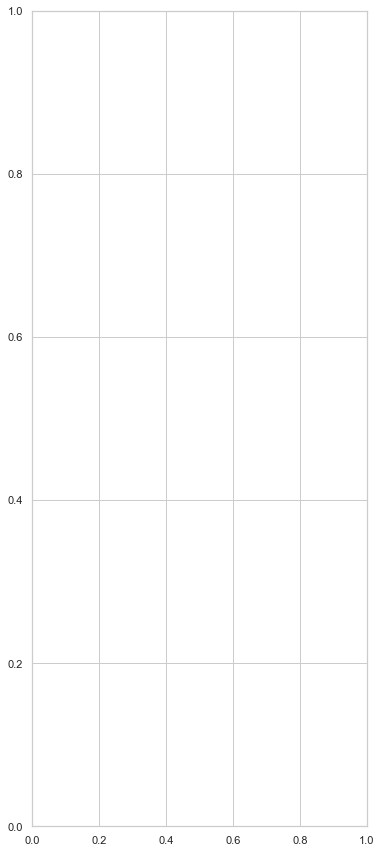

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='star1', y='primary_topic', data=agg, label="STAR1", color="r", alpha=0.2, stacked=True)

sns.set_color_codes('muted')
sns.barplot(x='star2', y='primary_topic', data=agg, label="STAR2", color="g", alpha=0.8)

sns.set_color_codes('muted')
sns.barplot(x='star3', y='primary_topic', data=agg, label="STAR3", color="b", alpha=0.3)

sns.set_color_codes('pastel')
sns.barplot(x='star4', y='primary_topic', data=agg, label="STAR4", color="magenta", alpha=0.1)

sns.set_color_codes('pastel')
sns.barplot(x='star5', y='primary_topic', data=agg, label="STAR5", color="brown", alpha=0.1)

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0,500), ylabel="star ratings", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

In [145]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## For topic 1, recomment is the most important keyword in terms of uniquness across all topics, while keyword place seems to show up the most in this topic. 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from scipy.stats import randint


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, 
                               subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                               max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
                               init=None, random_state=None, max_features=None, verbose=0, 
                               max_leaf_nodes=None, warm_start=False, presort='deprecated', 
                               validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
pipe = Pipeline([
    ('vect', tfidf), 
    ('clf', gbc)
    ])

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
# Gradient Boost Classifier
gbc_par_names = ["max_features", "max_depth", "min_samples_split", "min_samples_leaf"]

max_features_gbc = np.arange(2,10,2)
max_depth_gbc = range(2,6,2)
min_samples_split_gbc = np.linspace(2, 40, 10, endpoint=True).astype(int)
min_samples_leaf_gbc = np.linspace(2, 40, 10, endpoint=True).astype(int)
criterion_gbc = ["gini", "entropy"]
gbc_param_ranges = [max_features_gbc, max_depth_gbc, min_samples_split_gbc, min_samples_leaf_gbc]

param_dist = {
    'clf__max_features': max_features_gbc, 
    'clf__max_depth': max_depth_gbc, 
#     'clf__min_samples_split': min_samples_split_gbc, 
#     'clf__min_samples_leaf': min_samples_leaf_gbc
    }

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
rscv = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=2, cv=2, verbose=1, n_jobs=-1)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
rscv.fit(yelp['clean_text'], yelp['stars'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=0.75,
                                                              max_features=100,
                                                              min_df=10,
                                                       

In [ ]:
# Predictions on test sample
pred = rscv.predict(rndm_review)
pred